<a href="https://colab.research.google.com/github/EasonChen78/machine_learning/blob/main/20230421_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from tensorflow.keras.datasets.cifar10 import load_data
((x_train, y_train), (x_test, y_test)) = load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [22]:
#trans = ["飛機", "汽車", "鳥", "貓", "鹿", "狗", "青蛙", "馬", "船", "卡車"]
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

In [12]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

答案是： 狗


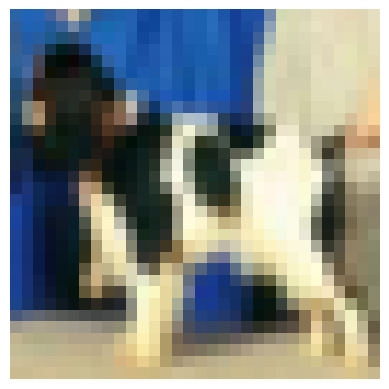

In [13]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, 49999)
print("答案是：", trans[y_train[idx]])
plt.axis("off")
plt.imshow(x_train[idx])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense
layers = [
    Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=2),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=2),
    Conv2D(256, (3,3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=2),
    Conv2D(512, (3,3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=2),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]

model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 256)       

In [15]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255


In [16]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(x_train_norm, y_train, batch_size=100, epochs=40, validation_split=0.1, callbacks=c)

Epoch 1/40
450/450 [==============================] - 370s 817ms/step - loss: 1.5534 - accuracy: 0.4259 - val_loss: 1.1961 - val_accuracy: 0.5740
Epoch 2/40
450/450 [==============================] - 394s 877ms/step - loss: 1.0940 - accuracy: 0.6088 - val_loss: 0.9661 - val_accuracy: 0.6590
Epoch 3/40
450/450 [==============================] - 383s 851ms/step - loss: 0.8611 - accuracy: 0.6945 - val_loss: 0.8079 - val_accuracy: 0.7220
Epoch 4/40
450/450 [==============================] - 386s 857ms/step - loss: 0.7198 - accuracy: 0.7494 - val_loss: 0.6955 - val_accuracy: 0.7630
Epoch 5/40
450/450 [==============================] - 369s 819ms/step - loss: 0.6022 - accuracy: 0.7898 - val_loss: 0.6883 - val_accuracy: 0.7616
Epoch 6/40
450/450 [==============================] - 369s 821ms/step - loss: 0.5093 - accuracy: 0.8229 - val_loss: 0.6428 - val_accuracy: 0.7752
Epoch 7/40
450/450 [==============================] - 370s 822ms/step - loss: 0.4221 - accuracy: 0.8511 - val_loss: 0.6320 -

In [18]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 18s 56ms/step - loss: 0.6766 - accuracy: 0.7726


[0.6765873432159424, 0.772599995136261]

In [20]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
pre = model.predict(x_test_norm).argmax(axis=1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat, 
       index=[f"{i}(true)" for i in range(0, 10)],
       columns=[f"{i}(pred)" for i in range(0, 10)])

313/313 [==============================] - 18s 58ms/step


,0(pred),1(pred),2(pred),3(pred),4(pred),5(pred),6(pred),7(pred),8(pred),9(pred)
0(true),749,12,63,25,16,7,6,14,94,14
1(true),18,862,3,10,2,5,13,3,40,44
2(true),36,1,713,57,66,47,45,25,6,4
3(true),18,4,64,598,54,171,39,36,9,7
4(true),4,2,73,35,780,30,23,42,10,1
5(true),8,2,41,138,45,713,7,38,7,1
6(true),4,1,56,47,34,30,812,8,6,2
7(true),10,0,26,29,62,55,3,806,4,5
8(true),20,6,14,17,5,3,5,2,921,7
9(true),35,75,9,19,1,11,7,17,54,772


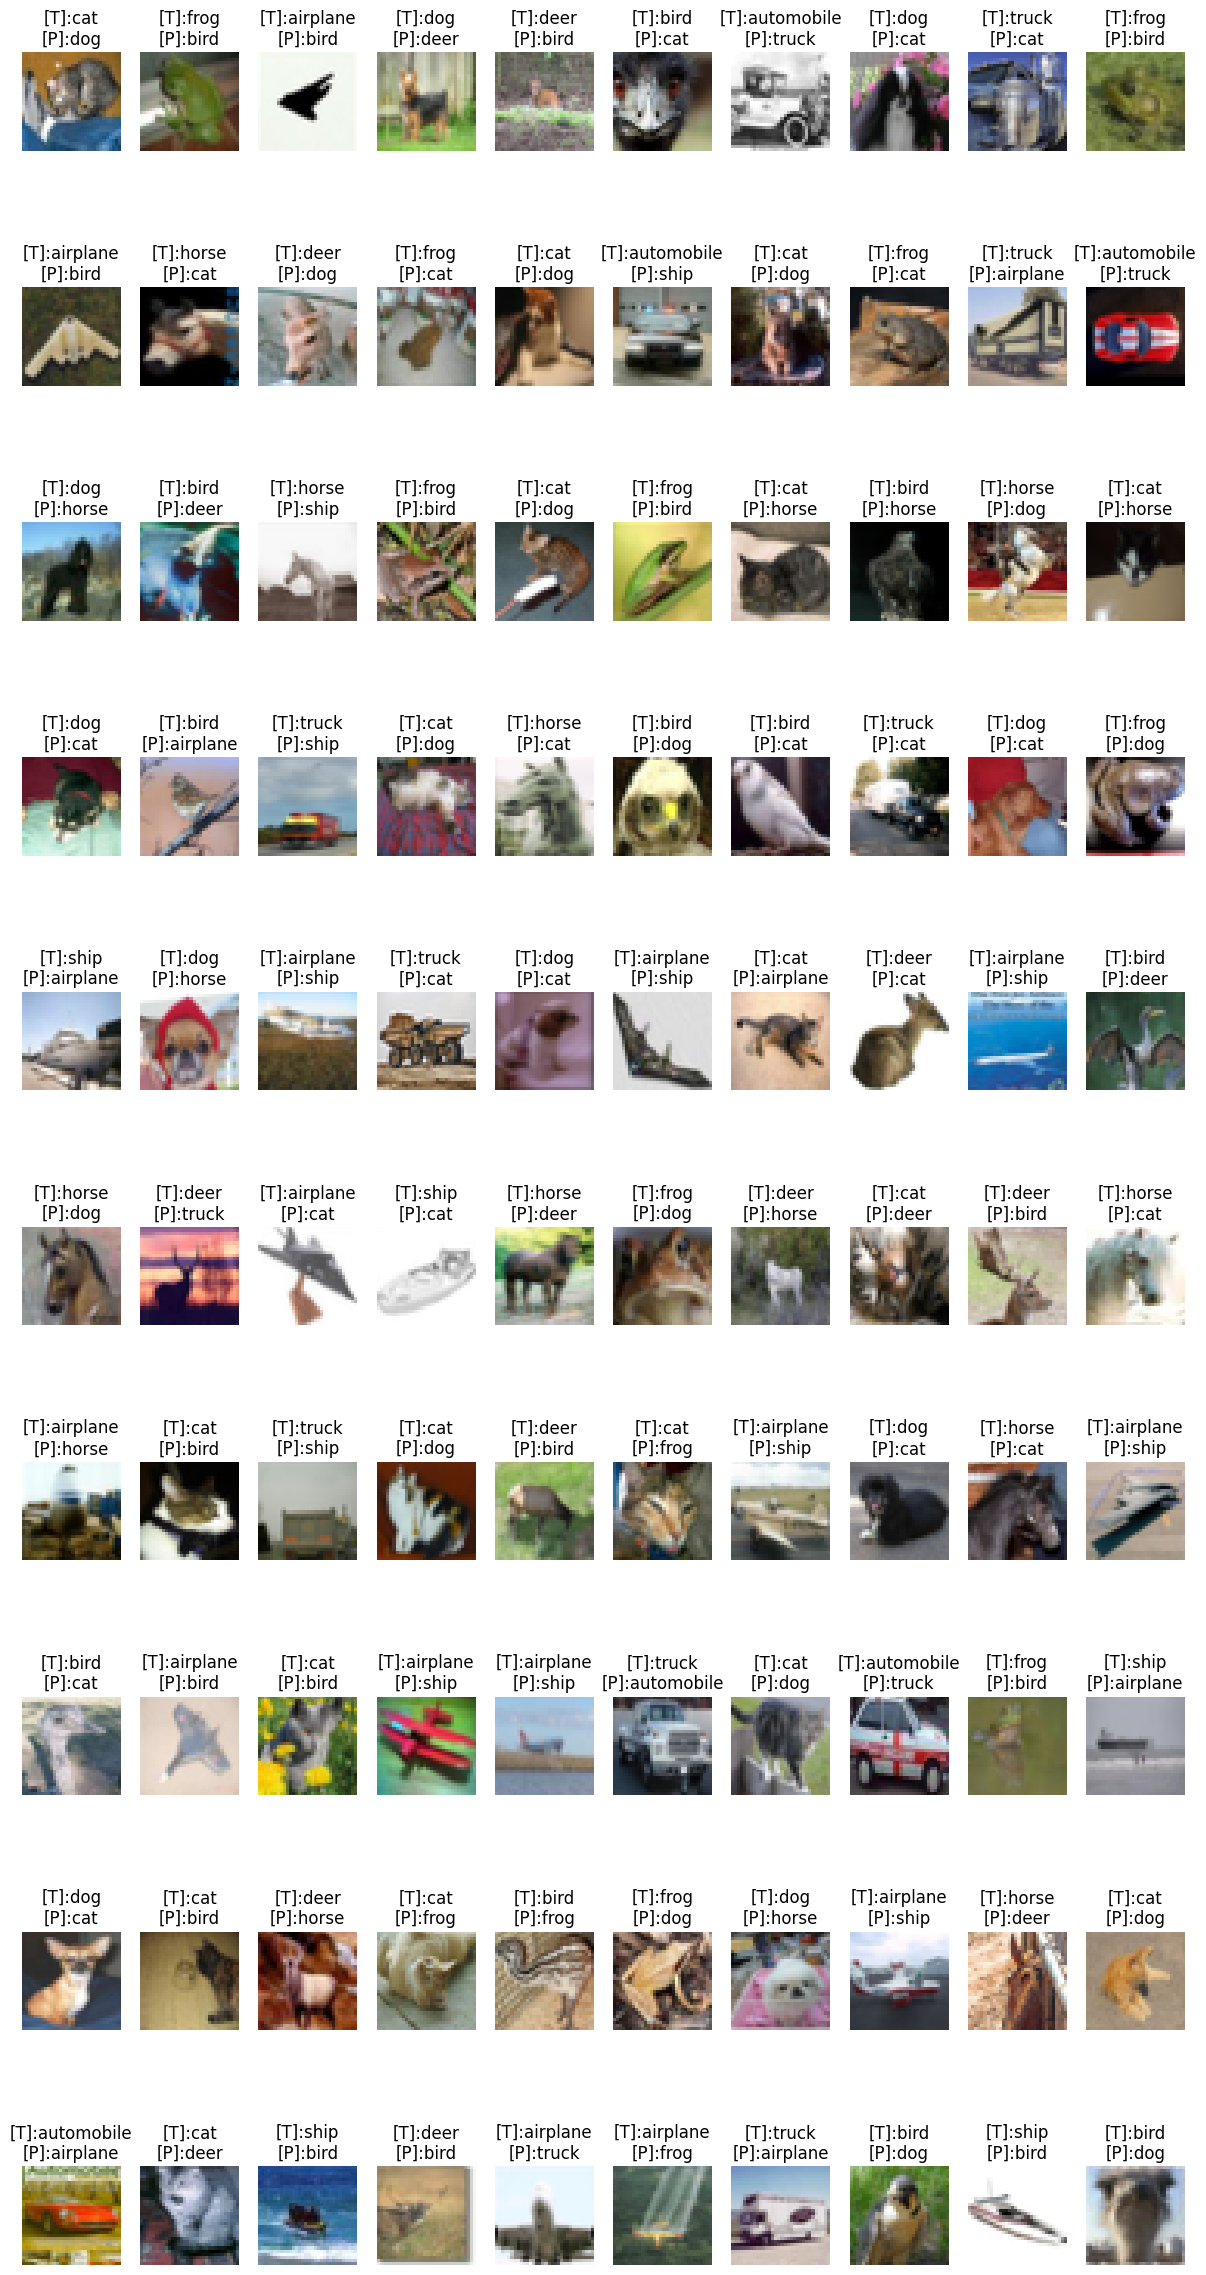

In [23]:
idx = np.nonzero(pre != y_test)[0]
idx = idx[:100]
plt.figure(figsize=(15, 30))
fp_pred = pre[idx]
fp_true = y_test[idx]
fp_img = x_test[idx]
for i in range(len(idx)):
  plt.subplot(10, 10, i+1)
  plt.axis("off")
  t = f"[T]:{trans[fp_true[i]]}\n[P]:{trans[fp_pred[i]]}"
  plt.title(t)
  plt.imshow(fp_img[i])

1/1 [==============================] - 0s 53ms/step
airplane 的機率是： 0.005
automobile 的機率是： 0.0923
bird 的機率是： 0.0109
cat 的機率是： 0.1427
deer 的機率是： 1e-04
dog 的機率是： 0.1178
frog 的機率是： 0.0008
horse 的機率是： 0.0164
ship 的機率是： 0.5157
truck 的機率是： 0.0983
最高機率是： 8


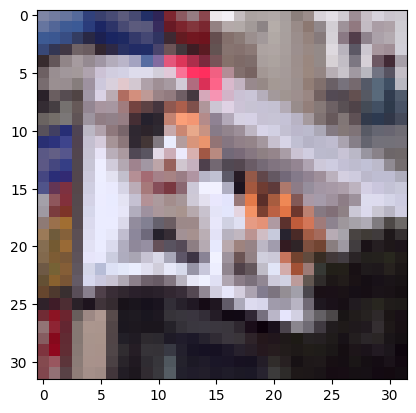

In [26]:
import requests
from PIL import Image
url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/aglzo4nc-1625740186.jpeg?crop=0.665xw:1.00xh;0.133xw,0&resize=640:*" #@param {type:"string"}
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36"
}
response = requests.get(url, stream=True, headers=h)

img = Image.open(response.raw).resize((32, 32)).convert("RGB")
img_np = np.array(img)
testx = img_np.reshape(1, 32, 32, 3) / 255.0
probas = model.predict(testx)[0]
for i in range(0, 10):
  print(trans[i], "的機率是：", round(probas[i], 4))
ans = probas.argmax(axis=-1)
print("最高機率是：", ans)
plt.imshow(img_np)

1/1 [==============================] - 0s 42ms/step


<ipython-input-27-979b517efe49>:27: RuntimeWarning: invalid value encountered in true_divide
  fil = (fil - mi) / (ma - mi)


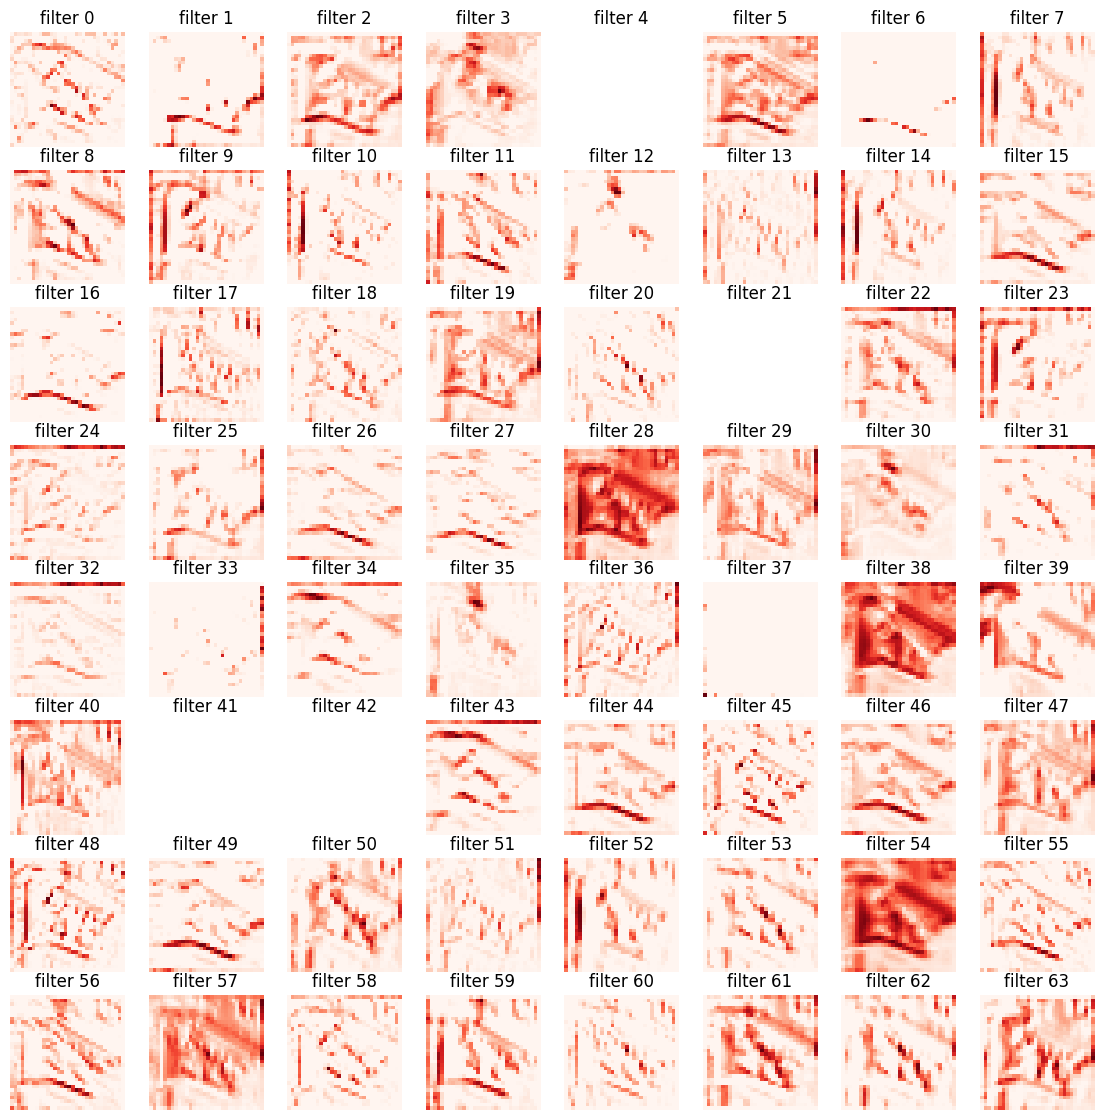

In [27]:
# first layer
layers = [
    model.layers[0]
]
# 256那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
# ]
# 512那層
# layers = [
#     model.layers[0],
#     model.layers[2],
#     model.layers[4],
#     model.layers[6],
# ]
partial = Sequential(layers)
conv = partial.predict(img_np.reshape(1, 32, 32, 3))[0]
plt.figure(figsize=(14, 14))
# 取出64種組合方式的某一個
for i in range(64):
    idx = i
    fil = conv[:,:,i]
    # 0~1
    ma, mi = fil.max(), fil.min()
    fil = (fil - mi) / (ma - mi)
    title = "filter {}".format(i)
    plt.subplot(8, 8, i+1)
    plt.title(title)
    plt.axis("off")
    plt.imshow(fil, cmap="Reds")